# Travel Planner Based on Currency Conversion Risk

**Project Goal:** Create a travel planning tool that will allow the user to select a set of countries they would like to travel to and a travel timeframe (3,6,12 months). The tool will analyze historical Forex data and predict the country that will have the most favorable currency within the given travel timeframe.

**The tool will:** Check Forex volatility as barometer for travel decisions Use historical forex data (up to 2 years) 3 - 6 - 12 months predictive outlook using Monte Carlo and other algorithms Produce graphs, risk graphs, value graphs, Variables - currency / country, traveling times (3-6-12 months)


### Import Library

In [1]:
import os
import requests
import pandas as pd
import pandas_datareader as pdr

from pandas_datareader import data as wb
import seaborn as sns

from dotenv import load_dotenv
import numpy as np
%matplotlib inline
import json
from forex_python.converter import CurrencyRates
import datetime as dt
from countryinfo import CountryInfo

from yahoofinancials import YahooFinancials

import plotly.express as px
from pathlib import Path
#Interactive Plot 
import plotly.offline as pyo
#Candlestick Chart
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
load_dotenv()

# Set up API credentials

# Set Alpha Vantage API key 
alpha_vantage_api_key = os.getenv("ALPHA_VANTAGE_API")

# Verify that Alpha Vantage key was correctly loaded
print(f"Alpha Vantage Key type: {type(alpha_vantage_api_key)}")


# Set the Mapbox API key
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)
# Verify that Mapbox API key was correctly loaded
print(f"Mapbox Key type: {type(map_box_api)}")

Alpha Vantage Key type: <class 'str'>
Mapbox Key type: <class 'str'>


### Country 1

In [3]:
name = (input("What Country are you interested in traveling to? "))
country_name = CountryInfo(name).name()
country_border= CountryInfo(name).borders()
country_capital= CountryInfo(name).capital()
country_currency = CountryInfo(name).currencies()
country_timezone = CountryInfo(name).timezones()
country_wiki = CountryInfo(name).wiki()
country_info = print(f"Country name: {country_name}", '\n'
                      f"Country Capital: {country_capital}", '\n'
                      f"Country Border: {country_border}", '\n' 
                      f"Country Currency: {country_currency}", '\n' 
                      f"Country Timezone: {country_timezone}", '\n'
                      f"Country Wiki: {country_wiki}")

country_info




What Country are you interested in traveling to?  Italy


Country name: italy 
Country Capital: Rome 
Country Border: ['AUT', 'FRA', 'SMR', 'SVN', 'CHE', 'VAT'] 
Country Currency: ['EUR'] 
Country Timezone: ['UTC+01:00'] 
Country Wiki: http://en.wikipedia.org/wiki/italy


### Country 2

In [4]:
name_2 = (input("What Country are you interested in traveling to? "))
country_name_2 = CountryInfo(name_2).name()
country_border_2= CountryInfo(name_2).borders()
country_capital_2= CountryInfo(name_2).capital()
country_currency_2 = CountryInfo(name_2).currencies()
country_timezone_2 = CountryInfo(name_2).timezones()
country_wiki_2 = CountryInfo(name_2).wiki()
country_info_2 = print(f"Country name: {country_name_2}", '\n'
                      f"Country Capital: {country_capital_2}", '\n'
                      f"Country Border: {country_border_2}", '\n' 
                      f"Country Currency: {country_currency_2}", '\n' 
                      f"Country Timezone: {country_timezone_2}", '\n'
                      f"Country Wiki: {country_wiki_2}")

country_info_2

What Country are you interested in traveling to?  japan


Country name: japan 
Country Capital: Tokyo 
Country Border: [] 
Country Currency: ['JPY'] 
Country Timezone: ['UTC+09:00'] 
Country Wiki: http://en.wikipedia.org/wiki/japan


### Country 3

In [5]:
name_3 = (input("What Country are you interested in traveling to? "))
country_name_3 = CountryInfo(name_3).name()
country_border_3= CountryInfo(name_3).borders()
country_capital_3= CountryInfo(name_3).capital()
country_currency_3 = CountryInfo(name_3).currencies()
country_timezone_3 = CountryInfo(name_3).timezones()
country_wiki_3 = CountryInfo(name_3).wiki()
country_info_3 = print(f"Country name: {country_name_3}", '\n'
                      f"Country Capital: {country_capital_3}", '\n'
                      f"Country Border: {country_border_3}", '\n' 
                      f"Country Currency: {country_currency_3}", '\n' 
                      f"Country Timezone: {country_timezone_3}", '\n'
                      f"Country Wiki: {country_wiki_3}")

country_info_3

What Country are you interested in traveling to?  canada


Country name: canada 
Country Capital: Ottawa 
Country Border: ['USA'] 
Country Currency: ['CAD'] 
Country Timezone: ['UTC−08:00', 'UTC−07:00', 'UTC−06:00', 'UTC−05:00', 'UTC−04:00', 'UTC−03:30'] 
Country Wiki: http://en.wikipedia.org/wiki/canada


In [6]:
#country Currency 1
pair = country_currency[0].strip("''")
forex_pair = pair + "USD"

#Country Currency 2
pair_2 = country_currency_2[0].strip("''")
forex_pair_2 = pair_2 + "USD"

#Country Currency 3
pair_3 = country_currency_3[0].strip("''")
forex_pair_3 = pair_3 + "USD"


In [9]:
# Currency 1
time_series = pdr.av.time_series.AVTimeSeriesReader(forex_pair, api_key='alpha_vantage_api_key')
forex = time_series.read()
forex.index = pd.to_datetime(forex.index, format='%Y-%m-%d')
Forex = forex

# Currency 2
time_series_2 = pdr.av.time_series.AVTimeSeriesReader(forex_pair_2, api_key='alpha_vantage_api_key')
forex_2 = time_series_2.read()
forex_2.index = pd.to_datetime(forex_2.index, format='%Y-%m-%d')
Forex_2 = forex_2

# Currency 3
time_series_3 = pdr.av.time_series.AVTimeSeriesReader(forex_pair_3, api_key='alpha_vantage_api_key')
forex_3 = time_series_3.read()
forex_3.index = pd.to_datetime(forex_3.index, format='%Y-%m-%d')
Forex_3 = forex_3

In [10]:
# Currency 1
forex_close = Forex.drop(columns=['volume', 'open', 'high', 'low'])

# Currency 2
forex_2_close = Forex_2.drop(columns=['volume', 'open', 'high', 'low'])

# Currency 3
forex_3_close = Forex_3.drop(columns=['volume', 'open', 'high', 'low'])

# Concat all 3 countries currency
joined_forex = pd.concat([forex_close, forex_2_close, forex_3_close], axis="columns", join="inner", keys=[f'{forex_pair}',f'{forex_pair_2}',f'{forex_pair_3}'])

In [ ]:
### vvv NEED TO FIX vvv

# Re name columns 

joined_forex_renamed = joined_forex.rename(columns={"close": f"{forex_pair}", "close": f"{forex_pair_2}", "close": f"{forex_pair_3}"})
joined_forex_renamed




### ^^^ NEED TO FIX ^^^

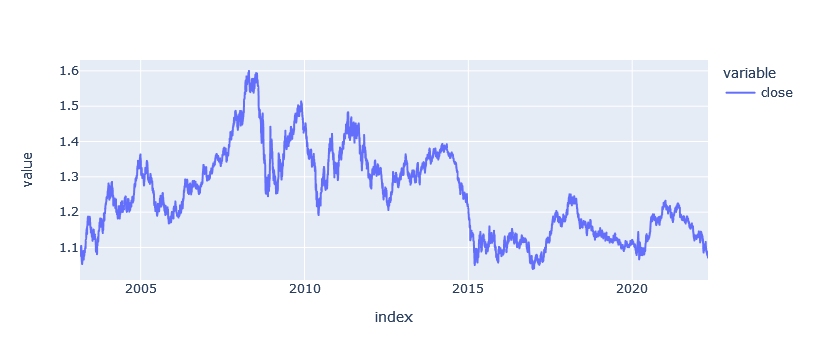

In [11]:
# Plot The Closing Value 
forex[['close']].plot()



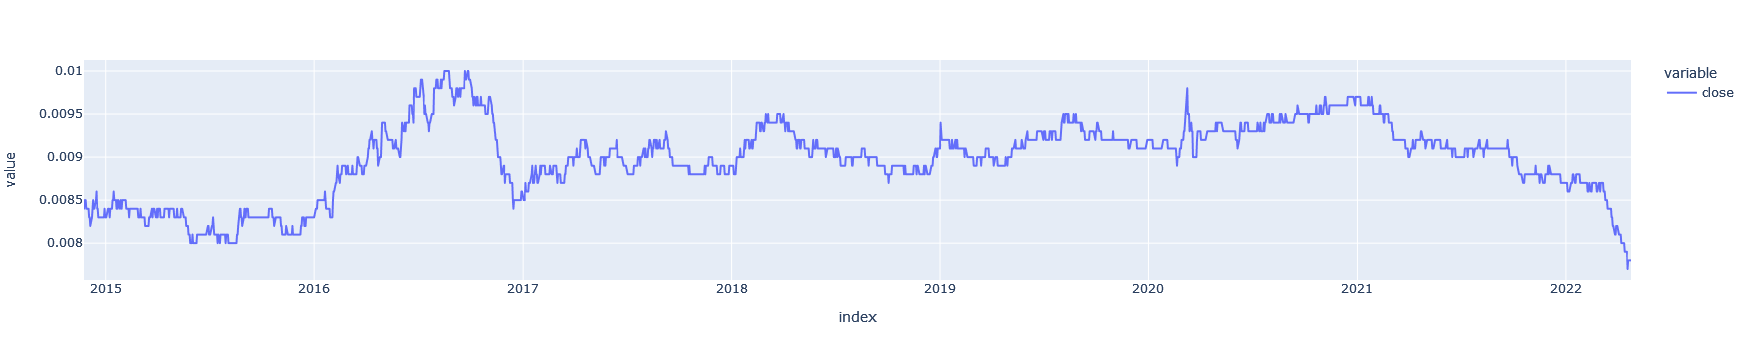

In [12]:
# Plot The Closing Value Of Country Currency 2
forex_2[['close']].plot()


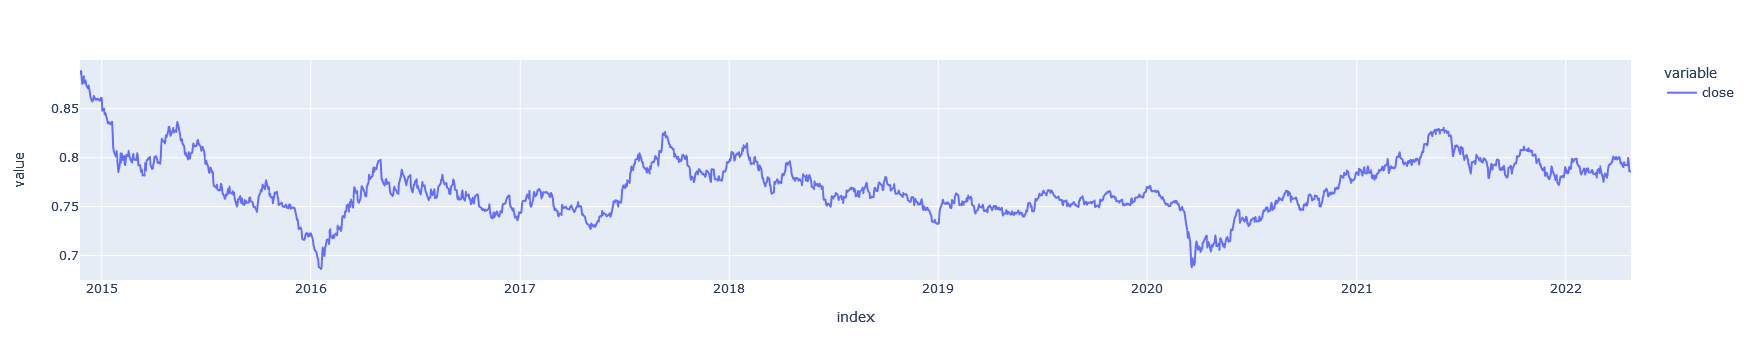

In [13]:
# Plot The Closing Value Of Country Currency 3
forex_3[['close']].plot()


In [14]:
forex_stats = forex.describe()
forex_stats

open         high          low        close  volume
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.0
mean      1.249036     1.254410     1.243603     1.249022     0.0
std       0.120295     0.121109     0.119448     0.120295     0.0
min       1.039000     1.041800     1.033900     1.039000     0.0
25%       1.140075     1.144475     1.135500     1.139900     0.0
50%       1.233350     1.238800     1.227800     1.233250     0.0
75%       1.335725     1.340625     1.329000     1.335825     0.0
max       1.599600     1.603500     1.586600     1.599600     0.0

In [15]:
forex_stats_2 = forex_2.describe()
forex_stats_2

open         high          low        close  volume
count  1936.000000  1936.000000  1936.000000  1936.000000  1936.0
mean      0.008983     0.009017     0.008953     0.008983     0.0
std       0.000430     0.000432     0.000430     0.000431     0.0
min       0.007700     0.007800     0.007700     0.007700     0.0
25%       0.008800     0.008800     0.008800     0.008800     0.0
50%       0.009000     0.009100     0.009000     0.009000     0.0
75%       0.009225     0.009300     0.009200     0.009225     0.0
max       0.010000     0.010000     0.010000     0.010000     0.0

In [16]:
forex_stats_3 = forex_3.describe()
forex_stats_3

open         high          low        close  volume
count  1936.000000  1936.000000  1936.000000  1936.000000  1936.0
mean      0.770445     0.773421     0.767674     0.770610     0.0
std       0.029288     0.029304     0.029133     0.029137     0.0
min       0.685800     0.690100     0.680200     0.686100     0.0
25%       0.751800     0.754300     0.749875     0.752000     0.0
50%       0.765700     0.768250     0.763100     0.765950     0.0
75%       0.789925     0.792900     0.786625     0.789925     0.0
max       0.889300     0.890700     0.884700     0.888700     0.0

# Plot the Candlestick charts

### Plot The First Countries Currency On A Candlestick Chart Verse The US Dollar

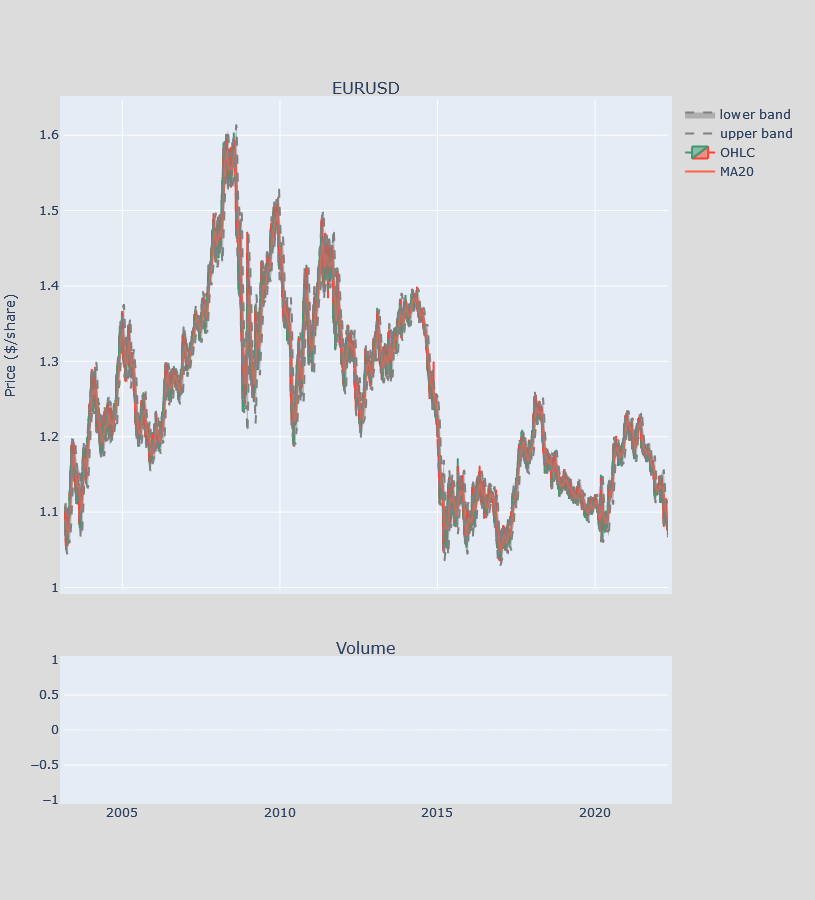

In [17]:
# Set moving Average and STD
forex['MA20'] = forex['close'].rolling(window=20, min_periods=0).mean()
forex['std'] = forex['close'].rolling(window=20, min_periods=0).std(ddof = 0)

# set fig
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair, 'Volume'), 
               row_width=[0.2, 0.7])



# Volume
fig.add_trace(go.Bar(x=forex.index, y=forex['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
fig.add_trace(go.Scatter(x=forex.index, y=forex["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
fig.add_trace(go.Candlestick(x=forex.index, open=forex["open"], high=forex["high"],
                low=forex["low"], close=forex["close"], name="OHLC"), 
                row=1, col=1)


# Create a Bollinger Band

# Upper Bound
fig.add_trace(go.Scatter(x=forex.index, 
                         y=forex["MA20"] + (forex['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x=forex.index, 
                         y=forex["MA20"] - (forex['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.01),
              row = 1, col = 1)


fig.update_layout(
#    title= f'{forex_pair} Historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=True,
    width=900,
    height=900,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='gainsboro'
    
)
# Remove range slider; (short time frame)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()

### Plot The Second Countries Currency On A Candlestick Chart Verse The US Dollar

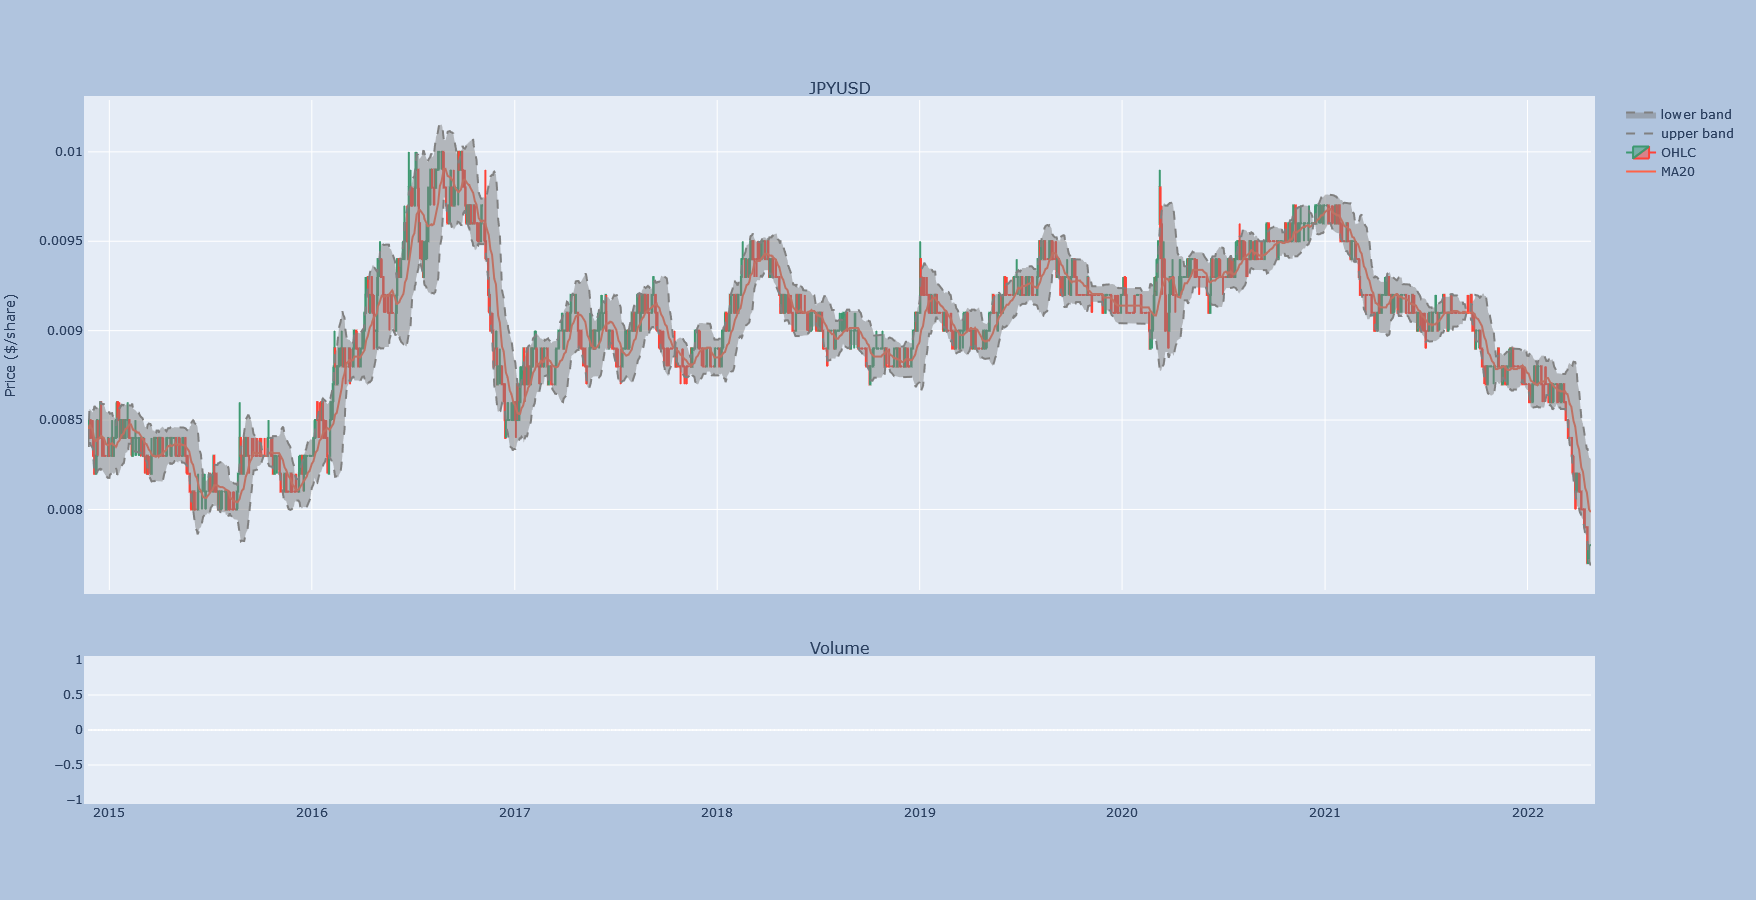

In [19]:
# Country Currency 2

# Set moving Average and STD
forex_2['MA20'] = forex_2['close'].rolling(window=20, min_periods=0).mean()
forex_2['std'] = forex_2['close'].rolling(window=20, min_periods=0).std(ddof = 0)

# set fig
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair_2, 'Volume'), 
               row_width=[0.2, 0.7])



# Volume
fig.add_trace(go.Bar(x=forex_2.index, y=forex_2['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
fig.add_trace(go.Scatter(x=forex_2.index, y=forex_2["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
fig.add_trace(go.Candlestick(x=forex_2.index, open=forex_2["open"], high=forex_2["high"],
                low=forex_2["low"], close=forex_2["close"], name="OHLC"), 
                row=1, col=1)


# Create a Bollinger Band

# Upper Bound
fig.add_trace(go.Scatter(x=forex_2.index, 
                         y=forex_2["MA20"] + (forex_2['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x=forex_2.index, 
                         y=forex_2["MA20"] - (forex_2['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.01),
              row = 1, col = 1)


fig.update_layout(
#    title= f'{forex_pair_2} Historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=True,
    width=900,
    height=900,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='LightSteelBlue'
    
)
# Remove range slider; (short time frame)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()



### Plot The Third Countries Currency On A Candlestick Chart Verse The US Dollar

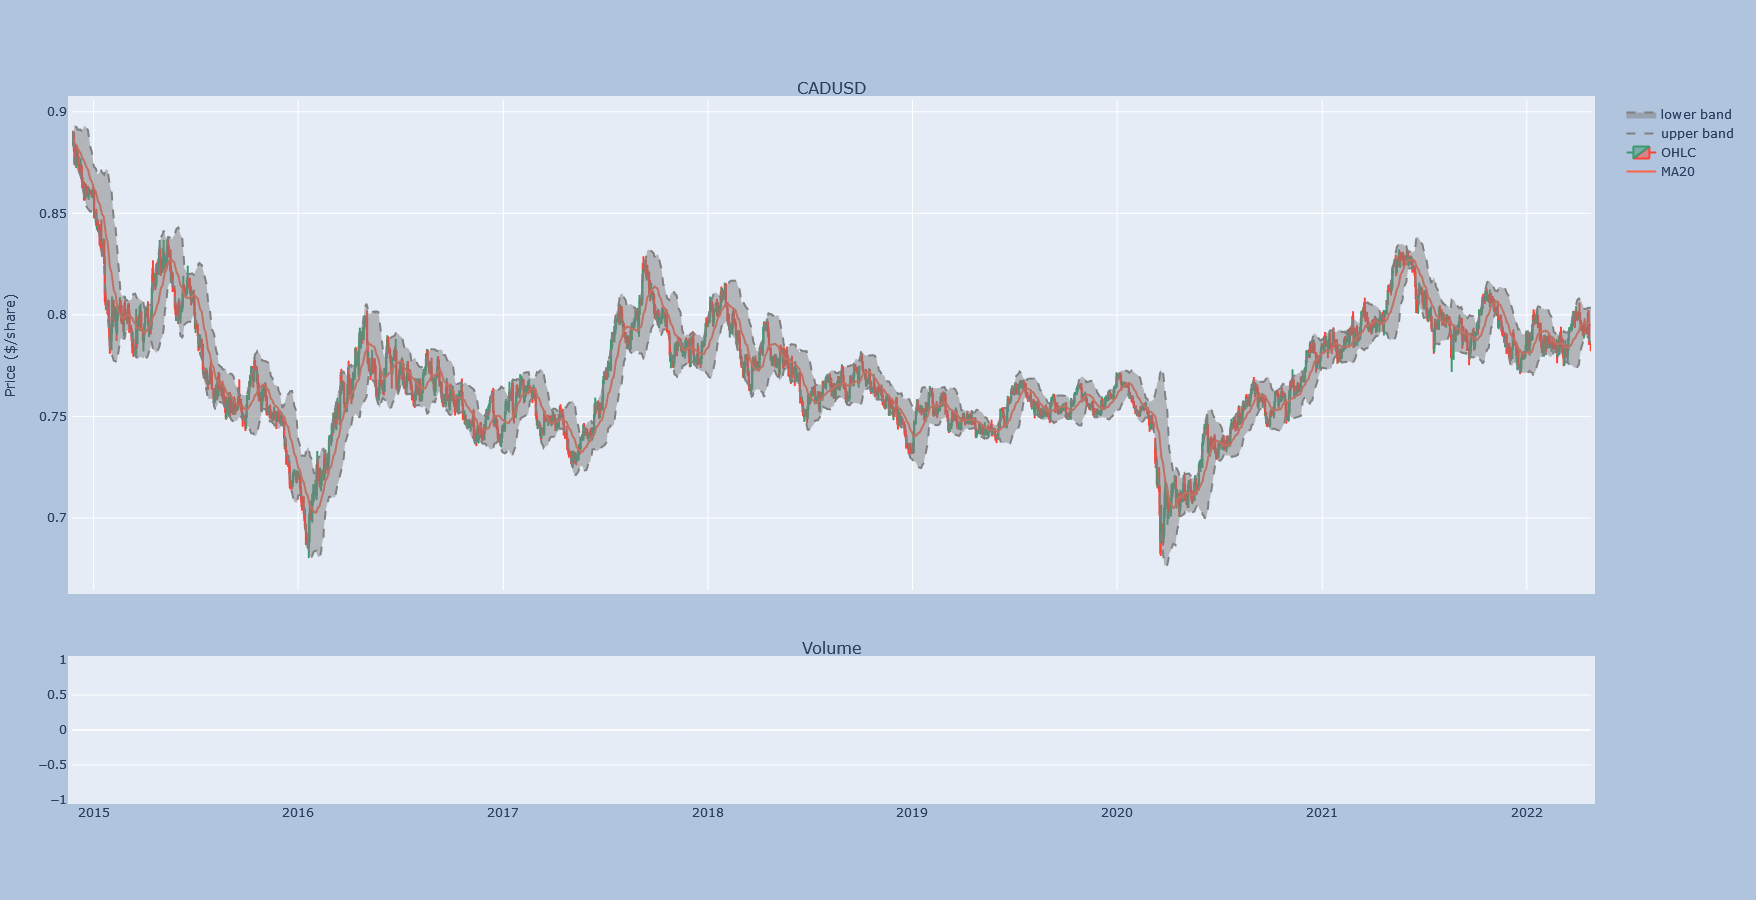

In [20]:
# Country Currency 3

# Set moving Average and STD
forex_3['MA20'] = forex_3['close'].rolling(window=20, min_periods=0).mean()
forex_3['std'] = forex_3['close'].rolling(window=20, min_periods=0).std(ddof = 0)

# set fig
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair_3, 'Volume'), 
               row_width=[0.2, 0.7])



# Volume
fig.add_trace(go.Bar(x=forex_3.index, y=forex_3['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
fig.add_trace(go.Scatter(x=forex_3.index, y=forex_3["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
fig.add_trace(go.Candlestick(x=forex_3.index, open=forex_3["open"], high=forex_3["high"],
                low=forex_3["low"], close=forex_3["close"], name="OHLC"), 
                row=1, col=1)


# Create a Bollinger Band

# Upper Bound
fig.add_trace(go.Scatter(x=forex_3.index, 
                         y=forex_3["MA20"] + (forex_3['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
fig.add_trace(go.Scatter(x=forex_3.index, 
                         y=forex_3["MA20"] - (forex_3['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.01),
              row = 1, col = 1)


fig.update_layout(
#    title= f'{forex_pair_2} Historical price chart',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='Price ($/share)',
        titlefont_size=14,
        tickfont_size=12,
    ),
    autosize=True,
    width=900,
    height=900,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor='LightSteelBlue'
    
)
# Remove range slider; (short time frame)
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()

# Foreign Exchange Currency Converter

In [21]:
# Only input the amount of currency to be converted. 

currency, amount = CurrencyRates(), int(input("Enter the Amount: "))
from_currency, to_currency = "USD", pair.upper()


print(from_currency, "To", to_currency, amount)
result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

Enter the Amount:  1000


USD To EUR 1000
Conversion Amount:  930.5788200260562


In [22]:
# Country 2 currency conversion

currency, amount = CurrencyRates(), amount
from_currency, to_currency = "USD", pair_2.upper()


print(from_currency, "To", to_currency, amount)
result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

USD To JPY 1000
Conversion Amount:  128168.62088218871


In [23]:
# country 3 currency conversion

currency, amount = CurrencyRates(), amount
from_currency, to_currency = "USD", pair_3.upper()


print(from_currency, "To", to_currency, amount)
result =  currency.convert(from_currency, to_currency, amount)
print("Conversion Amount: ", result)

USD To CAD 1000
Conversion Amount:  1275.7305043737204


# Monte Carlo Simulation on the returns of your inputed currency

### Plot the Simulated Outcomes for the inputed amount of days trajectory for the currency of country 1


### Country Currency 1 Monte Carlo 

In [24]:
time_series = pdr.av.time_series.AVTimeSeriesReader(f'{forex_pair}', api_key='alpha_vantage_api_key')
forex = time_series.read()
forex.index = pd.to_datetime(forex.index, format='%Y-%m-%d')
ticker_data = pd.concat([forex], axis=1, keys=[f'{forex_pair}'])
number_of_months = int(input("Input Number Of Months"))

# Configure a Monte Carlo simulation to forecast one year daily returns
forex_montecarlo = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = 50,
    num_trading_days = 21 * number_of_months
)

Input Number Of Months 12


In [25]:
# Run Monte Carlo simulations to forecast one year daily returns
forex_montecarlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


0         1         2         3         4         5         6   \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.997535  0.999085  1.006109  0.999137  0.999827  0.991938  1.009732   
2    0.993505  0.992271  1.007292  1.001482  1.005825  1.000948  1.008379   
3    1.000902  0.993796  1.010148  0.993162  1.009348  0.995788  1.002523   
4    1.001378  0.985009  1.000625  0.996387  1.009178  0.996155  0.999377   
..        ...       ...       ...       ...       ...       ...       ...   
248  0.983400  0.929038  0.908608  0.952933  0.931158  1.024685  0.990661   
249  0.988665  0.917621  0.907785  0.953881  0.926708  1.018559  0.986666   
250  0.989757  0.912049  0.909056  0.953089  0.928553  1.024737  0.988543   
251  0.986669  0.907950  0.913037  0.951645  0.926847  1.014309  0.980704   
252  0.982743  0.909705  0.910459  0.951129  0.923064  1.004928  0.979805   

           7         8         9   ...        40        41        42  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.992155  0.994098  0.988359  ...  0.996254  1.000469  1.000011   
2    0.994556  1.003717  0.978272  ...  1.004216  0.999202  1.002926   
3    0.995299  0.990912  0.975207  ...  1.002409  1.006568  0.997259   
4    0.992616  0.995667  0.970203  ...  1.002459  1.004786  0.998045   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.993938  1.050612  1.097841  ...  1.094135  1.092882  0.934863   
249  0.994974  1.044872  1.106433  ...  1.098586  1.097367  0.926796   
250  0.994708  1.050476  1.107523  ...  1.087353  1.110431  0.922357   
251  0.992918  1.049047  1.104647  ...  1.090444  1.107713  0.917530   
252  0.983399  1.054135  1.096741  ...  1.090524  1.103726  0.917889   

           43        44        45        46        47        48        49  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.006386  1.012810  0.996852  0.996297  0.991319  0.998894  0.994717  
2    0.998186  1.010436  0.989639  1.000502  1.001413  0.991133  0.989316  
3    1.002976  1.013357  0.987653  1.004795  0.990846  0.988732  0.987356  
4    0.995523  1.021294  0.995740  1.000430  0.988019  0.997141  0.979729  
..        ...       ...       ...       ...       ...       ...       ...  
248  0.965583  1.063884  0.977161  0.958910  0.898179  0.998319  0.985790  
249  0.967314  1.061387  0.977110  0.951946  0.903248  0.991914  0.985905  
250  0.975957  1.057208  0.981106  0.952339  0.895200  0.998951  0.984840  
251  0.978980  1.052006  0.988584  0.949845  0.891177  1.006751  0.982337  
252  0.988005  1.052466  0.989092  0.948177  0.887958  1.005225  0.987190  

[253 rows x 50 columns]

### Plot the Simulated Outcomes for the inputed amount of time

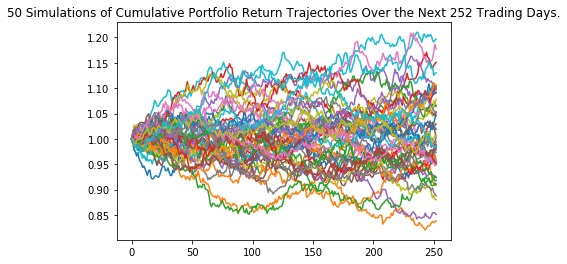

In [26]:
# Plot simulation outcomes
pd.options.plotting.backend = 'matplotlib'
line_plot = forex_montecarlo.plot_simulation()

### Plot the Simulated Daily Returns Trajectory for inputted countries currency over the Next Year (252 Trading Days)

In [27]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(forex_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_montecarlo.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  1.000452  0.999919  0.988137  1.014722
2  1.001447  1.000725  0.978264  1.026984
3  1.000118  1.000534  0.975197  1.025114
4  0.998997  0.998795  0.966222  1.027387

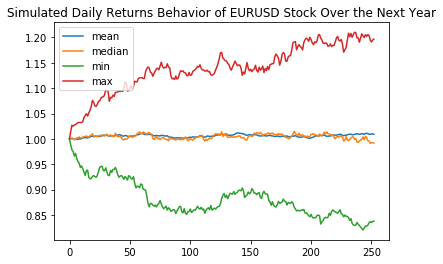

In [28]:
# Use the `plot` function to visually analyze the trajectory of first countries currency returns on a 252 trading day simulation
df_simulated_returns.plot(title=f"Simulated Daily Returns Behavior of {forex_pair} Stock Over the Next Year");

### Calculate the Simulated Profits/Losses of inputted amount in first countries currency over the Next imputted amount of Trading Days

In [29]:
# Set initial investment
initial_investment = amount

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample dat
cumulative_pnl.head()

mean       median          min          max
0  1000.000000  1000.000000  1000.000000  1000.000000
1  1000.452239   999.919026   988.136713  1014.721810
2  1001.446945  1000.724521   978.263894  1026.984084
3  1000.118231  1000.534260   975.196695  1025.113758
4   998.996588   998.795316   966.221746  1027.386869

### Plot the Simulated Profits/Losses of inputted amount in first countries currency Over the Next inputted amount of Trading Days

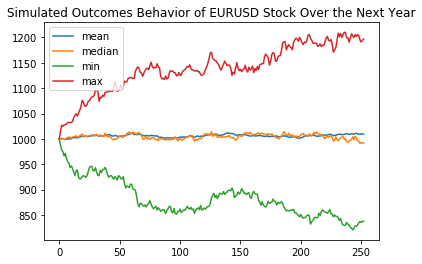

In [30]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {forex_pair} Stock Over the Next Year")

### Calculate the range of the possible outcomes of our inputted amount in first countries currency

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = forex_montecarlo.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           50.000000
mean             1.009300
std              0.082885
min              0.837828
25%              0.954108
50%              0.991649
75%              1.075327
max              1.196767
95% CI Lower     0.857817
95% CI Upper     1.171324
Name: 252, dtype: float64


In [32]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our inputted amount in first countries currency
ci_lower = round(tbl[8]*amount,2)
ci_upper = round(tbl[9]*amount,2)

# Print results
print(f"There is a 95% chance that your travel budget of ${amount}"
      f" will end within the range of "
      f" ${ci_lower} and ${ci_upper},"
      f" by the time of your projected vacation.")

There is a 95% chance that your travel budget of $1000 will end within the range of  $857.82 and $1171.32, by the time of your projected vacation.


## Second Countries Currency - Monte Carlo

In [33]:
time_series_2 = pdr.av.time_series.AVTimeSeriesReader(f'{forex_pair_2}', api_key='alpha_vantage_api_key')
forex_2 = time_series.read()
forex_2.index = pd.to_datetime(forex_2.index, format='%Y-%m-%d')
ticker_data_2 = pd.concat([forex_2], axis=1, keys=[f'{forex_pair_2}'])
number_of_months = number_of_months

# Configure a Monte Carlo simulation to forecast one year daily returns
forex_2_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = 50,
    num_trading_days = 21 * number_of_months
)

In [34]:
# Run Monte Carlo simulations to forecast one year daily returns
forex_2_montecarlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


0         1         2         3         4         5         6   \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.997874  1.000125  0.999026  1.004140  1.007663  1.002449  1.001091   
2    0.994198  1.003066  0.996651  1.009795  1.002429  1.014588  0.996329   
3    0.999898  0.997308  0.999235  1.001290  1.002725  1.011734  1.000952   
4    1.008619  0.988235  0.991829  1.003506  1.011034  1.018863  0.996588   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.207236  0.965075  0.934882  1.090520  1.087522  1.078430  0.982133   
249  1.222881  0.963832  0.930098  1.098653  1.095221  1.083737  0.982185   
250  1.228072  0.957704  0.935336  1.093904  1.090178  1.070604  0.980104   
251  1.229066  0.965765  0.930779  1.101689  1.081596  1.070109  0.985793   
252  1.220204  0.966881  0.930972  1.099915  1.079881  1.063848  0.983837   

           7         8         9   ...        40        41        42  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.996796  0.999238  1.003466  ...  1.007966  0.997087  1.005799   
2    0.992742  0.996602  1.004139  ...  1.014865  0.992115  1.008711   
3    0.987426  0.993645  1.010517  ...  1.020940  0.985641  1.014360   
4    0.987108  0.985468  0.995149  ...  1.023750  0.978429  1.009997   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.062582  0.926114  1.040715  ...  1.208053  1.012131  1.014423   
249  1.068837  0.919941  1.045362  ...  1.196701  1.009102  1.014802   
250  1.065944  0.921813  1.039092  ...  1.199570  1.009908  1.012844   
251  1.069335  0.919183  1.033939  ...  1.196358  1.007125  1.018440   
252  1.069118  0.933133  1.033181  ...  1.188708  1.007437  1.016695   

           43        44        45        46        47        48        49  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.006240  0.985286  0.996387  0.990154  1.004048  1.000577  1.000226  
2    0.997914  0.993343  0.996363  0.984696  1.001482  1.015985  1.001033  
3    0.998688  0.988248  0.998635  0.979206  1.002899  1.030191  1.005841  
4    0.983700  0.992815  1.001258  0.977852  1.007613  1.024583  1.012979  
..        ...       ...       ...       ...       ...       ...       ...  
248  0.930060  0.913521  1.058329  1.021626  1.003808  1.015806  1.001505  
249  0.934570  0.922955  1.054950  1.030151  1.000654  1.020426  1.001732  
250  0.932026  0.917904  1.047344  1.032360  0.999338  1.011606  1.005651  
251  0.931595  0.918766  1.044424  1.034358  0.997406  1.014523  1.001158  
252  0.926824  0.920067  1.042016  1.044545  1.000758  1.010526  0.991964  

[253 rows x 50 columns]

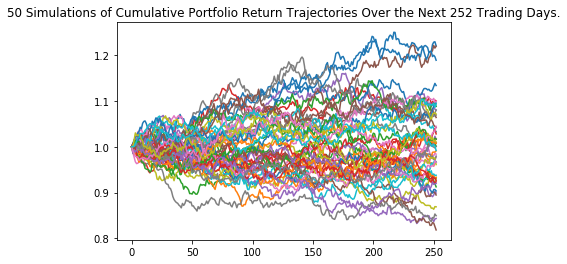

In [35]:
# Plot simulation outcomes
pd.options.plotting.backend = 'matplotlib'
line_plot_2 = forex_2_montecarlo.plot_simulation()

### Plot the Simulated Daily Returns Trajectory for the second countries currency

In [36]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data_2 = {
    "mean": list(forex_2_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_2_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_2_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_2_montecarlo.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_2 = pd.DataFrame(simulated_returns_data_2)

# Display sample data
df_simulated_returns_2.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  0.998857  0.999220  0.985286  1.007966
2  0.998940  0.997948  0.976920  1.015985
3  0.999030  0.999474  0.967178  1.030191
4  0.998771  0.997074  0.963290  1.024583

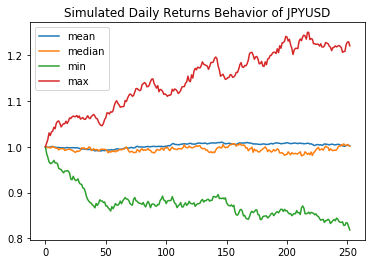

In [37]:
# Use the `plot` function to visually analyze the trajectory of first countries currency returns on a 252 trading day simulation
df_simulated_returns_2.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_2}");

### Calculate the Simulated Profits/Losses of inputted amount in first countries currency over the Next imputted amount of Trading Days

In [38]:
# Set initial investment
initial_investment = amount

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl_2 = initial_investment * df_simulated_returns_2

# Display sample dat
cumulative_pnl_2.head()

mean       median          min          max
0  1000.000000  1000.000000  1000.000000  1000.000000
1   998.856663   999.220011   985.285638  1007.966320
2   998.940003   997.947616   976.919828  1015.985484
3   999.030252   999.474288   967.177553  1030.191378
4   998.771395   997.074387   963.289879  1024.582661

### Plot the Simulated Profits/Losses of inputted amount in first countries currency Over the Next inputted amount of Trading Days

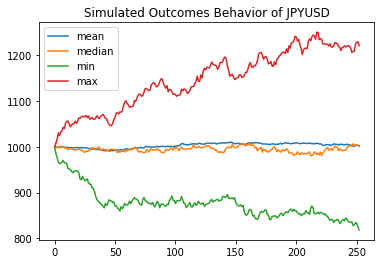

In [39]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl_2.plot(title=f"Simulated Outcomes Behavior of {forex_pair_2}")

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_2 = forex_2_montecarlo.summarize_cumulative_return()

# Print summary statistics
print(tbl_2)

count           50.000000
mean             1.002193
std              0.090949
min              0.818605
25%              0.933188
50%              1.001010
75%              1.067801
max              1.220204
95% CI Lower     0.844825
95% CI Upper     1.212347
Name: 252, dtype: float64


In [41]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our inputted amount in first countries currency
ci_lower_2 = round(tbl_2[8]*amount,2)
ci_upper_2 = round(tbl_2[9]*amount,2)

# Print results
print(f"There is a 95% chance that your travel budget of ${amount}"
      f" will end within the range of "
      f" ${ci_lower_2} and ${ci_upper_2},"
      f" by the time of your projected vacation.")

There is a 95% chance that your travel budget of $1000 will end within the range of  $844.83 and $1212.35, by the time of your projected vacation.


## Third Countries Currency - Monte Carlo

In [44]:
time_series_3 = pdr.av.time_series.AVTimeSeriesReader(f'{forex_pair_3}', api_key='alpha_vantage_api_key')
forex_3 = time_series.read()
forex_3.index = pd.to_datetime(forex_3.index, format='%Y-%m-%d')
ticker_data_3 = pd.concat([forex_3], axis=1, keys=[f'{forex_pair_3}'])
number_of_months = number_of_months

# Configure a Monte Carlo simulation to forecast one year daily returns
forex_3_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = 50,
    num_trading_days = 21 * number_of_months
)

In [45]:
# Run Monte Carlo simulations to forecast projected returns
forex_3_montecarlo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


0         1         2         3         4         5         6   \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.003300  0.991403  0.989578  1.001358  1.001156  0.995643  1.000959   
2    1.009325  0.988485  0.991812  1.006490  1.002351  0.994426  0.994835   
3    1.008505  0.988086  0.991074  1.012555  0.999341  0.990055  1.003713   
4    0.999685  0.977816  0.989453  1.010341  1.004432  0.983846  0.999389   
..        ...       ...       ...       ...       ...       ...       ...   
248  0.956879  0.921980  1.094907  0.927209  0.998248  0.998245  0.926955   
249  0.957368  0.927451  1.099053  0.927904  1.007621  1.006048  0.918574   
250  0.959120  0.936298  1.105094  0.925338  1.007656  1.005183  0.915747   
251  0.966074  0.931617  1.086316  0.918483  1.007351  0.995172  0.923487   
252  0.971670  0.940501  1.084218  0.913191  1.001703  1.002676  0.905447   

           7         8         9   ...        40        41        42  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    1.002707  1.000760  0.999970  ...  0.998799  0.999017  1.003318   
2    1.000963  0.992465  0.995892  ...  1.004760  1.001659  0.995430   
3    1.005336  0.985783  0.995722  ...  0.990404  0.998532  0.991358   
4    1.008812  0.981979  0.999646  ...  0.996652  0.997399  0.991887   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.935365  0.973657  0.983564  ...  0.937191  0.885839  0.992348   
249  0.946815  0.975873  0.996757  ...  0.943368  0.881365  1.000486   
250  0.952026  0.974301  1.000681  ...  0.951361  0.887381  1.000685   
251  0.954220  0.975597  1.003603  ...  0.957176  0.894112  0.997082   
252  0.965945  0.977113  1.004439  ...  0.959854  0.889234  1.004097   

           43        44        45        46        47        48        49  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.999711  0.997306  1.001422  0.997886  0.999224  1.001194  1.000997  
2    1.007896  0.989521  1.005635  0.992995  1.008387  0.994668  0.992219  
3    1.004152  0.988210  1.007873  0.993972  1.012852  0.983624  0.997620  
4    1.008068  0.979287  1.005577  0.998012  1.025461  0.991651  1.000701  
..        ...       ...       ...       ...       ...       ...       ...  
248  0.896570  1.001152  0.969135  0.952398  0.974451  0.969353  0.891965  
249  0.887315  1.003984  0.960299  0.948369  0.980250  0.963137  0.889626  
250  0.880056  1.004241  0.967068  0.957734  0.981525  0.953598  0.895713  
251  0.873430  1.006528  0.962651  0.957762  0.978715  0.945529  0.891234  
252  0.866180  1.004134  0.956357  0.968496  0.974639  0.946492  0.897401  

[253 rows x 50 columns]

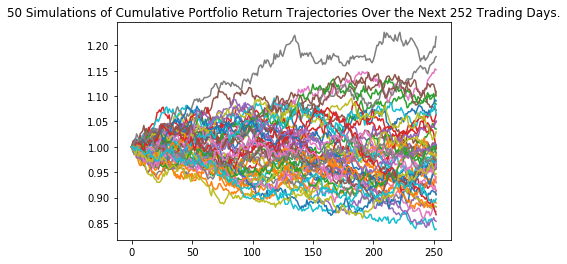

In [46]:
# Plot simulation outcomes
pd.options.plotting.backend = 'matplotlib'
line_plot_3 = forex_3_montecarlo.plot_simulation()

### Plot the Simulated Daily Returns Trajectory for the second countries currency

In [48]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data_3 = {
    "mean": list(forex_3_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_3_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_3_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_3_montecarlo.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns_3 = pd.DataFrame(simulated_returns_data_3)

# Display sample data
df_simulated_returns_3.head()

mean    median       min       max
0  1.000000  1.000000  1.000000  1.000000
1  0.999558  0.999465  0.989578  1.011158
2  0.999886  1.001164  0.984524  1.013184
3  0.999178  0.998076  0.983624  1.017093
4  0.998442  0.999461  0.977816  1.025461

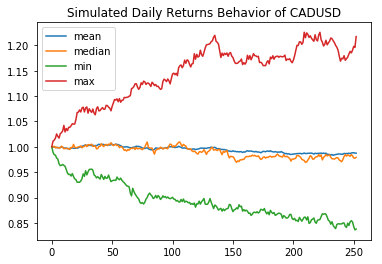

In [49]:
# Use the `plot` function to visually analyze the trajectory of third countries currency returns on a simulation
df_simulated_returns_3.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_3}");

### Calculate the Simulated Profits/Losses of inputted amount in first countries currency over the Next imputted amount of Trading Days

In [50]:
# Set initial investment
initial_investment = amount

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl_3 = initial_investment * df_simulated_returns_3

# Display sample data
cumulative_pnl_3.head()

mean       median          min          max
0  1000.000000  1000.000000  1000.000000  1000.000000
1   999.558203   999.465152   989.577526  1011.158364
2   999.885913  1001.163715   984.523942  1013.184076
3   999.178088   998.076041   983.623988  1017.093381
4   998.441911   999.461395   977.816125  1025.460962

### Plot the Simulated Profits/Losses of inputted amount in first countries currency Over the Next inputted amount of Trading Days

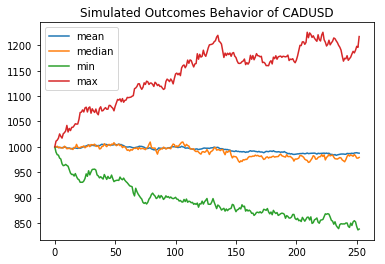

In [52]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl_3.plot(title=f"Simulated Outcomes Behavior of {forex_pair_3}");

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_3 = forex_3_montecarlo.summarize_cumulative_return()

# Print summary statistics
print(tbl_3)

count           50.000000
mean             0.987512
std              0.083164
min              0.837831
25%              0.932416
50%              0.979204
75%              1.033658
max              1.217542
95% CI Lower     0.856067
95% CI Upper     1.172146
Name: 252, dtype: float64


In [54]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our inputted amount in first countries currency
ci_lower_3 = round(tbl_2[8]*amount,2)
ci_upper_3 = round(tbl_2[9]*amount,2)

# Print results
print(f"There is a 95% chance that your travel budget of ${amount}"
      f" will end within the range of "
      f" ${ci_lower_3} and ${ci_upper_3},"
      f" by the time of your projected vacation.")

There is a 95% chance that your travel budget of $1000 will end within the range of  $844.83 and $1212.35, by the time of your projected vacation.


In [60]:
print(f"Comparing all 3 desired countries currencies,"
      f" there is a 95% chance that your travel budget of ${amount}"
      f" will end within the range of: " "\n"
      f" ${ci_lower} and ${ci_upper} for {forex_pair}," "\n"
      f" ${ci_lower_2} and ${ci_upper_2} for {forex_pair_2}," "\n"
      f" ${ci_lower_3} and ${ci_upper_3} for {forex_pair_3}," "\n"
      f" by the time of your projected vacation.")

Comparing all 3 desired countries currencies, there is a 95% chance that your travel budget of $1000 will end within the range of: 
 $857.82 and $1171.32 for EURUSD,
 $844.83 and $1212.35 for JPYUSD,
 $844.83 and $1212.35 for CADUSD,
 by the time of your projected vacation.


# Beta

### Introduce US dollar as benchmark and clean data

In [63]:
# Import US Dollar Index
yahoo_financials = YahooFinancials('DX-Y.NYB')

# Read in US dollar index
read_us_dollar = YahooFinancials('DX-Y.NYB')

# Get US Dollars Historical Price data

# Dict of Dicts 
us_dollar = read_us_dollar.get_historical_price_data('2010-04-23', '2022-04-23', 'daily')

#Parse the data and isolate 'Prices' from the dictionary
us_dollar_price = us_dollar["DX-Y.NYB"]["prices"]

#Create df
us_dollar_df = pd.DataFrame(us_dollar_price)
us_dollar_df

date        high         low        open       close  volume  \
0     1271995200   82.099998   81.320000   82.019997   81.349998     0.0   
1     1272168000         NaN         NaN         NaN         NaN     NaN   
2     1272254400   81.709999   81.169998   81.470001   81.480003     0.0   
3     1272340800   82.440002   81.169998   81.180000   82.150002     0.0   
4     1272427200   82.709999   82.019997   82.290001   82.379997     0.0   
...          ...         ...         ...         ...         ...     ...   
3645  1650254400  100.860001  100.459999  100.500000  100.779999     0.0   
3646  1650340800  101.029999  100.699997  100.830002  100.959999     0.0   
3647  1650427200  101.040001  100.220001  100.980003  100.389999     0.0   
3648  1650513600  100.639999   99.820000  100.349998  100.580002     0.0   
3649  1650600000  101.330002  100.470001  100.620003  101.220001     0.0   

        adjclose formatted_date  
0      81.349998     2010-04-23  
1            NaN     2010-04-25  
2      81.480003     2010-04-26  
3      82.150002     2010-04-27  
4      82.379997     2010-04-28  
...          ...            ...  
3645  100.779999     2022-04-18  
3646  100.959999     2022-04-19  
3647  100.389999     2022-04-20  
3648  100.580002     2022-04-21  
3649  101.220001     2022-04-22  

[3650 rows x 8 columns]

In [64]:
# Set the date as the index to the DataFrame
us_dollar_df.set_index(pd.to_datetime(us_dollar_df['formatted_date'], infer_datetime_format=True), inplace=True)

# Drop un needed columns 
us_dollar_df.drop(columns=['date', 'open', 'high', 'low', 'volume', 'adjclose', 'formatted_date'], inplace=True)

# Rename index and column 
#us_dollar_df.rename(index={'formatted_date': 'Date'}, columns={'close': 'Close'})

# Count nulls
us_dollar_df.isnull().sum()

# Drop nulls
us_dollar_df = us_dollar_df.dropna()

us_dollar_df.head()

close
formatted_date           
2010-04-23      81.349998
2010-04-26      81.480003
2010-04-27      82.150002
2010-04-28      82.379997
2010-04-29      82.000000

In [65]:
# Calculate Daily Returns

us_dollar_daily_returns = us_dollar_df.pct_change().dropna()
us_dollar_daily_returns

close
formatted_date          
2010-04-26      0.001598
2010-04-27      0.008223
2010-04-28      0.002800
2010-04-29     -0.004613
2010-04-30     -0.001585
...                  ...
2022-04-18      0.004585
2022-04-19      0.001786
2022-04-20     -0.005646
2022-04-21      0.001893
2022-04-22      0.006363

[3020 rows x 1 columns]

# Calculate Daily Returns

In [66]:
# Calculate Daily Returns four country 1

forex_daily_returns = forex_close.pct_change().dropna()
forex_daily_returns

close
2003-02-26  0.002229
2003-02-27 -0.002039
2003-02-28  0.003158
2003-03-03  0.007684
2003-03-04 -0.000827
...              ...
2022-04-19  0.000928
2022-04-20  0.005840
2022-04-21 -0.001475
2022-04-22 -0.003784
2022-04-25 -0.007504

[4999 rows x 1 columns]

In [67]:
# Calculate Daily Returns four country 2

forex_2_daily_returns = forex_2_close.pct_change().dropna()
forex_2_daily_returns

close
2014-11-25  0.011905
2014-11-26  0.000000
2014-11-27  0.000000
2014-11-28 -0.011765
2014-12-01  0.000000
...              ...
2022-04-19 -0.025316
2022-04-20  0.012987
2022-04-21  0.000000
2022-04-22  0.000000
2022-04-25  0.000000

[1935 rows x 1 columns]

In [68]:
# Calculate Daily Returns four country 3

forex_3_daily_returns = forex_3_close.pct_change().dropna()
forex_3_daily_returns

close
2014-11-25  0.002370
2014-11-26  0.000788
2014-11-27 -0.007989
2014-11-28 -0.006919
2014-12-01  0.008795
...              ...
2022-04-19 -0.000883
2022-04-20  0.009848
2022-04-21 -0.006502
2022-04-22 -0.010697
2022-04-25 -0.000382

[1935 rows x 1 columns]

In [69]:
joined_forex_daily_returns = joined_forex.pct_change().dropna()
joined_forex_daily_returns

EURUSD    JPYUSD    CADUSD
               close     close     close
2014-11-25  0.002814  0.011905  0.002370
2014-11-26  0.002726  0.000000  0.000788
2014-11-27 -0.003918  0.000000 -0.007989
2014-11-28 -0.000562 -0.011765 -0.006919
2014-12-01  0.001687  0.000000  0.008795
...              ...       ...       ...
2022-04-19  0.000928 -0.025316 -0.000883
2022-04-20  0.005840  0.012987  0.009848
2022-04-21 -0.001475  0.000000 -0.006502
2022-04-22 -0.003784  0.000000 -0.010697
2022-04-25 -0.007504  0.000000 -0.000382

[1935 rows x 3 columns]

In [98]:
# Concat Data and rename columns to reflect Daily returns

joined_data = pd.concat([joined_forex_daily_returns, us_dollar_daily_returns], axis='columns', join='inner')
joined_data.columns=[f'{forex_pair} Daily Returns',f'{forex_pair_2} Daily Returns', f'{forex_pair_3} Daily Returns', 'US Dollar Daily Returns']
joined_data

EURUSD Daily Returns  JPYUSD Daily Returns  CADUSD Daily Returns  \
2014-11-25              0.002814              0.011905              0.002370   
2014-11-26              0.002726              0.000000              0.000788   
2014-11-28             -0.000562             -0.011765             -0.006919   
2014-12-01              0.001687              0.000000              0.008795   
2014-12-02             -0.007136              0.000000             -0.007699   
...                          ...                   ...                   ...   
2022-04-18             -0.002499              0.000000              0.000379   
2022-04-19              0.000928             -0.025316             -0.000883   
2022-04-20              0.005840              0.012987              0.009848   
2022-04-21             -0.001475              0.000000             -0.006502   
2022-04-22             -0.003784              0.000000             -0.010697   

            US Dollar Daily Returns  
2014-11-25                -0.002609  
2014-11-26                -0.003526  
2014-11-28                 0.008561  
2014-12-01                -0.004640  
2014-12-02                 0.007959  
...                             ...  
2022-04-18                 0.004585  
2022-04-19                 0.001786  
2022-04-20                -0.005646  
2022-04-21                 0.001893  
2022-04-22                 0.006363  

[1864 rows x 4 columns]

# Performance Analysis

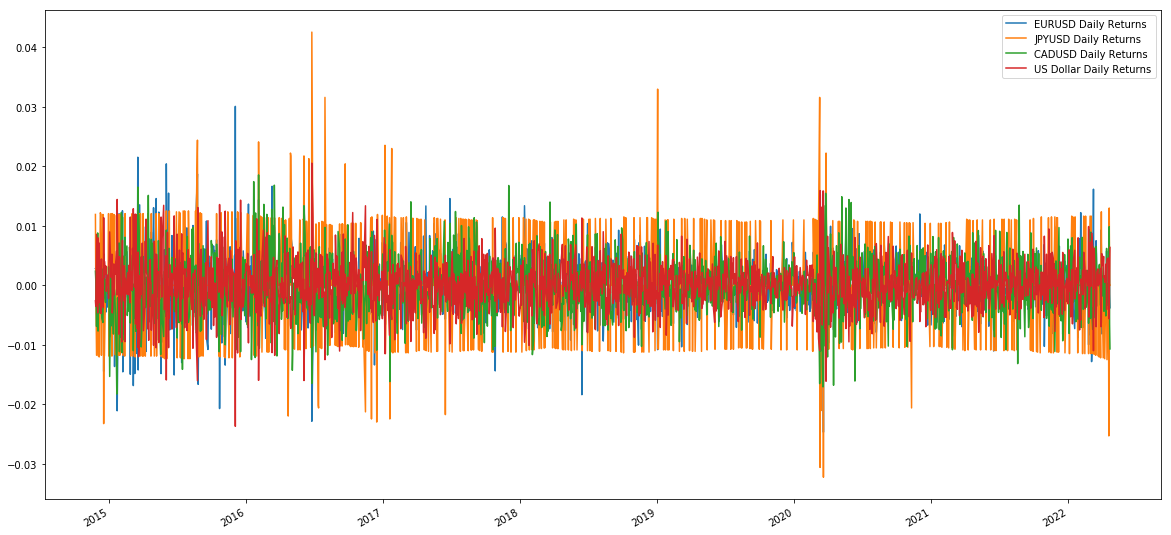

In [99]:
# Plot daily returns of all countries currencies

joined_data.plot(figsize=(20,10));

# Calculate and plot cumulative returns

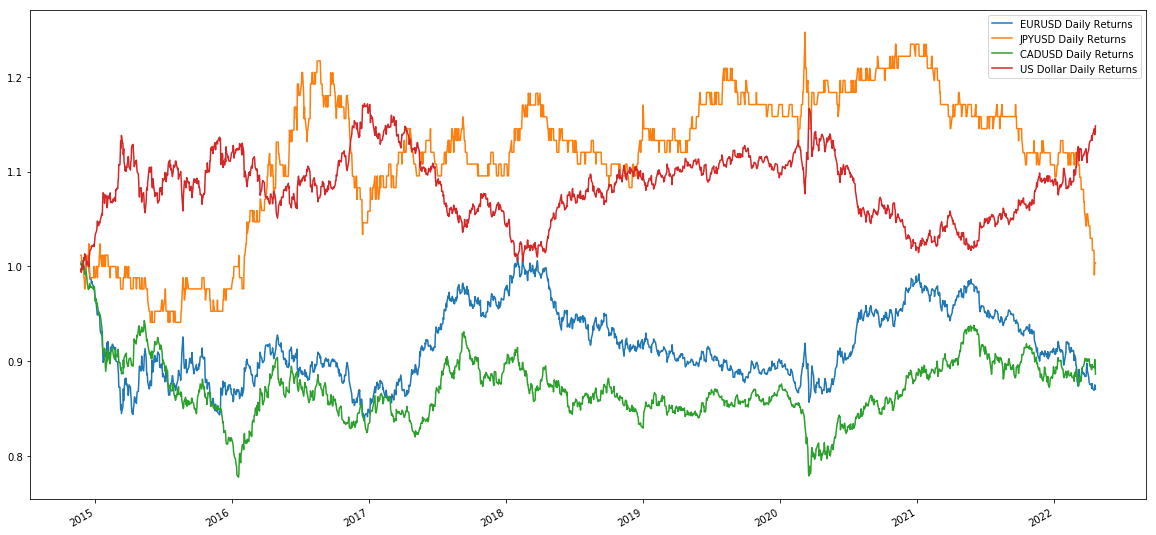

In [100]:
# Calculate cumulative returns of all countries currencies
cum_returns = (1+joined_data).cumprod()

# Plot cumulative returns
cum_returns.plot(figsize=(20,10));

### Create a box plot for each portfolio

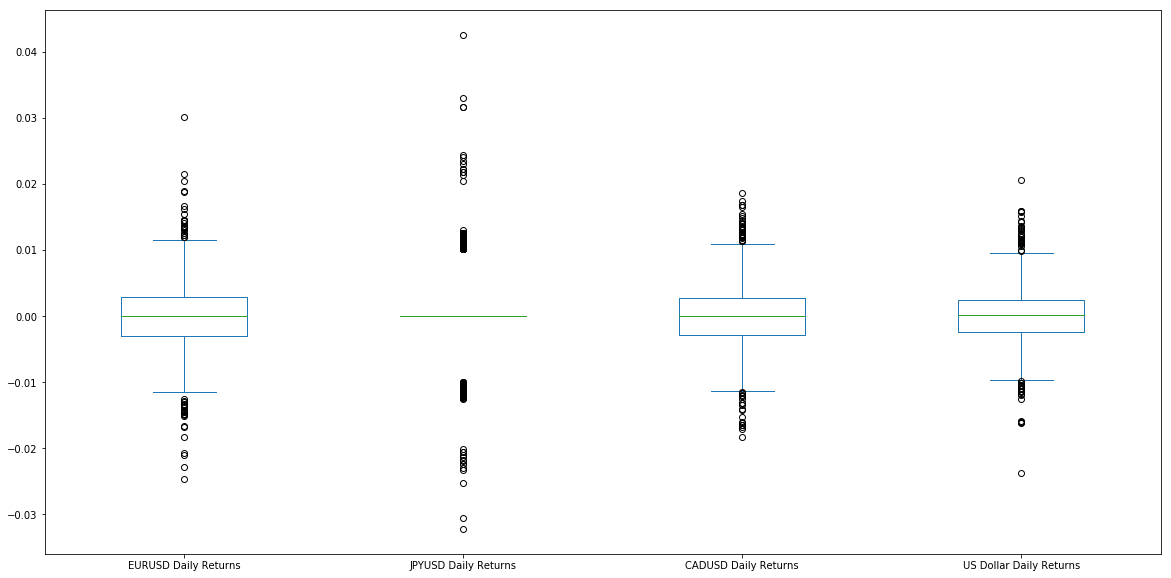

In [101]:
# Box plot to visually show risk

joined_data.plot.box(figsize=(20,10));

### Calculate Standard Deviations

In [102]:
# Calculate the daily standard deviations of all countreis currencies

joined_data_daily_returns_std = joined_data.std()
joined_data_daily_returns_std

EURUSD Daily Returns       0.004920
JPYUSD Daily Returns       0.006834
CADUSD Daily Returns       0.004773
US Dollar Daily Returns    0.004214
dtype: float64

### Determine which country currencies are riskier than the US Dollar Index

In [107]:
# Calculate  the daily standard deviation of US Dollar
isolated_dollar = joined_data['US Dollar Daily Returns'].std()

In [108]:
# Determine which countries currencies are riskier than the US Dollar
joined_forex_daily_returns_std > isolated_dollar

EURUSD  close    True
JPYUSD  close    True
CADUSD  close    True
dtype: bool

### Calculate the Anualized Standard Deviation

In [110]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = joined_data_daily_returns_std * np.sqrt(252)
annualized_std

EURUSD Daily Returns       0.078099
JPYUSD Daily Returns       0.108488
CADUSD Daily Returns       0.075770
US Dollar Daily Returns    0.066902
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all countries currencies using a 21-day window
2. Calculate the correlation between each countries currency to determine which currencies may mimick the US Dollar
3. Choose one currency, then calculate and plot the 60-day rolling beta between it and the US Dollar

### Calculate and plot rolling std for all portfolios with 21-day window

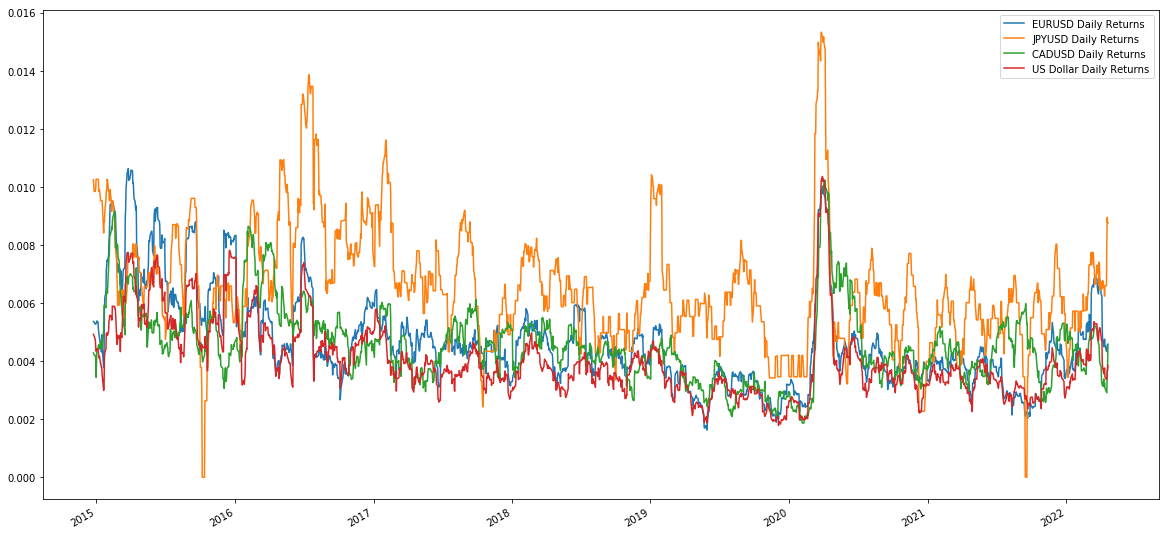

In [111]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
joined_forex_21_day_std = joined_data.rolling(window = 21).std()

# Plot the rolling standard deviation
joined_forex_21_day_std.plot(figsize=(20, 10));

### Calculate and plot the correlation

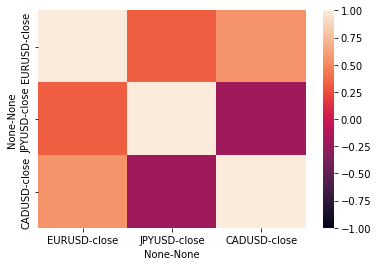

In [112]:
# Calculate the correlation
correlation = joined_forex.corr()

# Display de correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1);

### Calculate and Plot Beta for a chosen countreis currency and the US Dollar

In [114]:
# Chosen Country 1

# Calculate covariance of a single country currency
covariance = (joined_data[f'{forex_pair} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
covariance

# Calculate variance of S&P 500
variance = joined_data['US Dollar Daily Returns'].var()
variance

# Computing beta
beta = covariance / variance
beta

-1.0706271106632788

In [115]:
# Chosen Country 2

# Calculate covariance of a single country currency
covariance = (joined_data[f'{forex_pair_2} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
covariance

# Calculate variance of S&P 500
variance = joined_data['US Dollar Daily Returns'].var()
variance

# Computing beta
beta = covariance / variance
beta

-0.6443804496701943

In [116]:
# Chosen Country 3

# Calculate covariance of a single country currency
covariance = (joined_data[f'{forex_pair_3} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
covariance

# Calculate variance of S&P 500
variance = joined_data['US Dollar Daily Returns'].var()
variance

# Computing beta
beta = covariance / variance
beta

-0.5382543419901301

In [81]:
# Plot beta trend

sns.lmplot(x = "US Dollar Daily Returns", y = f"{forex_pair} Daily Returns", data = joined_forex, aspect = 1.5, fit_reg = True);

KeyError: "['EURUSD Daily Returns' 'US Dollar Daily Returns'] not in index"

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
combined_data_sharpe_ratios = (joined_forex_daily_returns.mean() * 252) / (joined_forex_daily_returns.std() * np.sqrt(252))
combined_data_sharpe_ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot
combined_data_sharpe_ratios.plot(kind="bar", title= "Combined Data Sharpe Ratios");

### What Countries Currency is the riskiest? 

# Build Map 

In [82]:
# Set Path and Read in csv data.

csvpath = Path("all_countries.csv")
country_list_df = pd.read_csv(csvpath)
#country_list_df

In [83]:
# Initialize lists to be turned into columns of dataframe
capital_city = []
lat_long = []
currency = []
subregion = []
wiki = []
lat = []
long = []

for country in country_list_df['Country']:
    country_data = CountryInfo(country)
    capital_city.append(country_data.capital())
    lat.append(country_data.capital_latlng()[0])
    long.append(country_data.capital_latlng()[1])
    currency.append(country_data.currencies())
    subregion.append(country_data.subregion())
    wiki.append(country_data.wiki()) 
    
# Build Dataframe

country_list_df['Capital City'] = capital_city
country_list_df['Latitude'] = lat
country_list_df['Longitude'] = long
country_list_df['Currency'] = currency
country_list_df['Sub-Region'] = subregion
country_list_df['wiki'] = wiki
country_list_df

Country Population\r\n(2020) Land Area\r\n (Km²)  \
0            Afghanistan           38,928,346             652,860   
1                Albania            2,877,797              27,400   
2                Algeria           43,851,044           2,381,740   
3                 Angola           32,866,272           1,246,700   
4    Antigua and Barbuda               97,929                 440   
..                   ...                  ...                 ...   
174            Venezuela           28,435,940             882,050   
175              Vietnam           97,338,579             310,070   
176                Yemen           29,825,964             527,970   
177               Zambia           18,383,955             743,390   
178             Zimbabwe           14,862,924             386,850   

    Density\r\n(P/Km²)  Capital City   Latitude   Longitude Currency  \
0                   60         Kabul  34.526011   69.177684    [AFN]   
1                  105        Tirana  41.326873   19.818791    [ALL]   
2                   18       Algiers  36.775361    3.060188    [DZD]   
3                   26        Luanda  -8.827270   13.243951    [AOA]   
4                  223  Saint John's  47.561701  -52.715149    [XCD]   
..                 ...           ...        ...         ...      ...   
174                 32       Caracas  10.506098  -66.914602    [VEF]   
175                314         Hanoi  21.029450  105.854444    [VND]   
176                 56        Sana'a  15.353857   44.205884    [YER]   
177                 25        Lusaka -15.416449   28.282154    [ZMK]   
178                 38        Harare -17.831773   31.045686    [USD]   

             Sub-Region                                              wiki  
0         Southern Asia          http://en.wikipedia.org/wiki/afghanistan  
1       Southern Europe              http://en.wikipedia.org/wiki/albania  
2       Northern Africa              http://en.wikipedia.org/wiki/algeria  
3         Middle Africa               http://en.wikipedia.org/wiki/angola  
4             Caribbean  http://en.wikipedia.org/wiki/antigua_and_barbuda  
..                  ...                                               ...  
174       South America            http://en.wikipedia.org/wiki/venezuela  
175  South-Eastern Asia              http://en.wikipedia.org/wiki/vietnam  
176        Western Asia                http://en.wikipedia.org/wiki/yemen  
177      Eastern Africa               http://en.wikipedia.org/wiki/zambia  
178      Eastern Africa             http://en.wikipedia.org/wiki/zimbabwe  

[179 rows x 10 columns]

### Plot the populated map

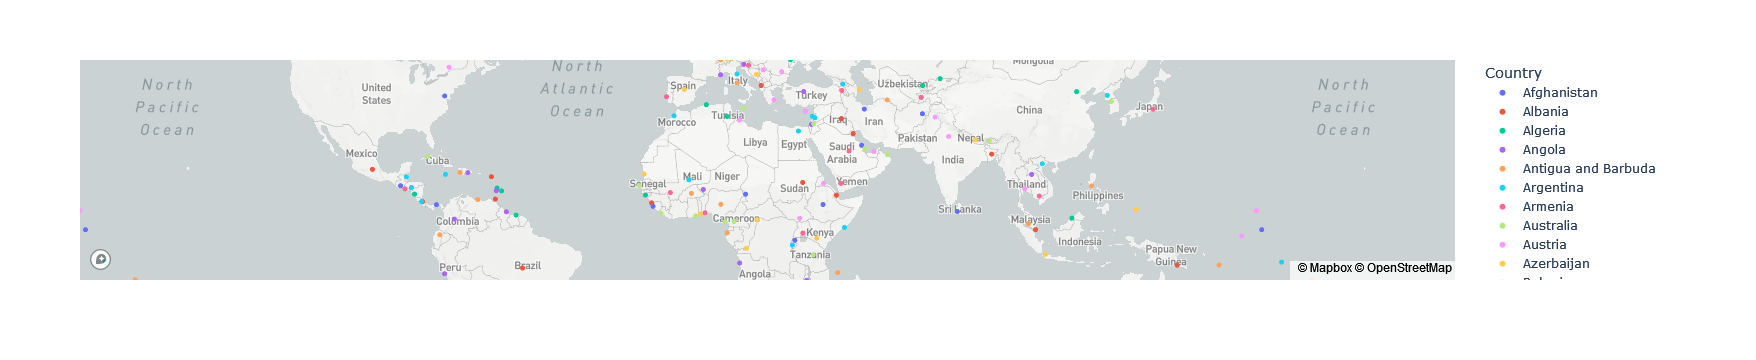

In [84]:
# Slice and plot data by name
map_1 = px.scatter_mapbox(
    country_list_df,
    lat='Latitude',
    lon='Longitude',
    color="Country",
    zoom=1.2
)
map_1.show()